**INSTALLING AND LOADING DATASET:**

In [1]:
!pip install datasets
from datasets import load_dataset

# Load dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")

# Display dataset info
print(dataset)


Defaulting to user installation because normal site-packages is not writeable
DatasetDict({
    train: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 1072
    })
    validation: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 126
    })
    test: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 153
    })
})


**PLOTTING HISTOGRAM:**

The dataset's text length distribution is depicted by the histogram, which also displays the frequency with which texts of various lengths appear. A typical distribution of text lengths in the dataset is indicated by the majority of teXTS.

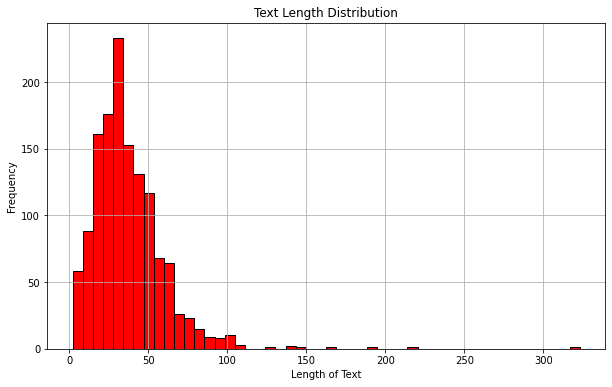

In [2]:
import matplotlib.pyplot as plt

# Get text lengths
text_lengths = [len(tokens) for data_split in dataset.values() for tokens in data_split['tokens']]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50, color='Red', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**CLASS DISTRIBUTION BAR CHART**

The dataset's distribution of class labels is displayed in a bar chart, indicating how frequently each class occurs. Classes are arranged according to frequency, with the most often occurring classes shown on the chart's left side. The distribution of the various classes in the dataset is shown in the graphic, which also emphasises the relative abundance of particular labels.

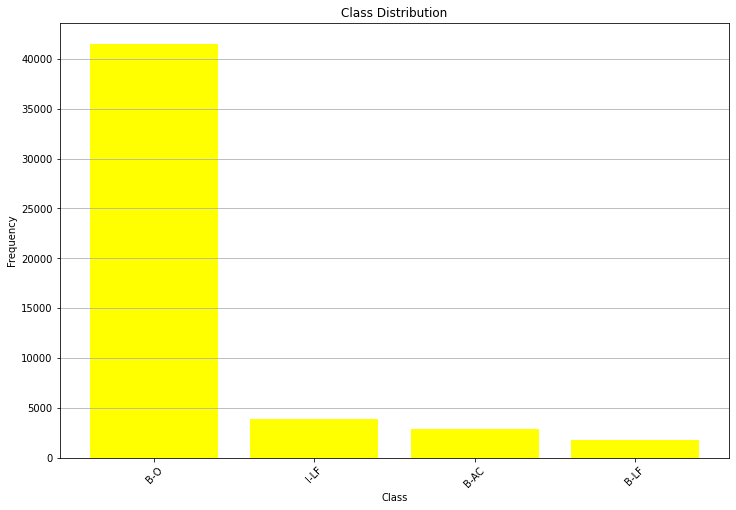

In [3]:
import numpy as np

# Get class labels and their frequencies
classes = np.unique([label for data_split in dataset.values() for label_list in data_split['ner_tags'] for label in label_list])
class_freq = {label: 0 for label in classes}
for data_split in dataset.values():
    for label_list in data_split['ner_tags']:
        for label in label_list:
            class_freq[label] += 1

# Sort classes by frequency
sorted_classes = sorted(class_freq.items(), key=lambda x: x[1], reverse=True)

# Plot bar chart
plt.figure(figsize=(12, 8))
plt.bar(*zip(*sorted_classes), color='yellow')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**WORD CLOUD VISUALIZATION**

Word size indicates frequency, and the word cloud displays the most frequently occurring words in the dataset. It offers a brief summary of the terms that appear most frequently in the text data, making it simple to identify important terms or themes.




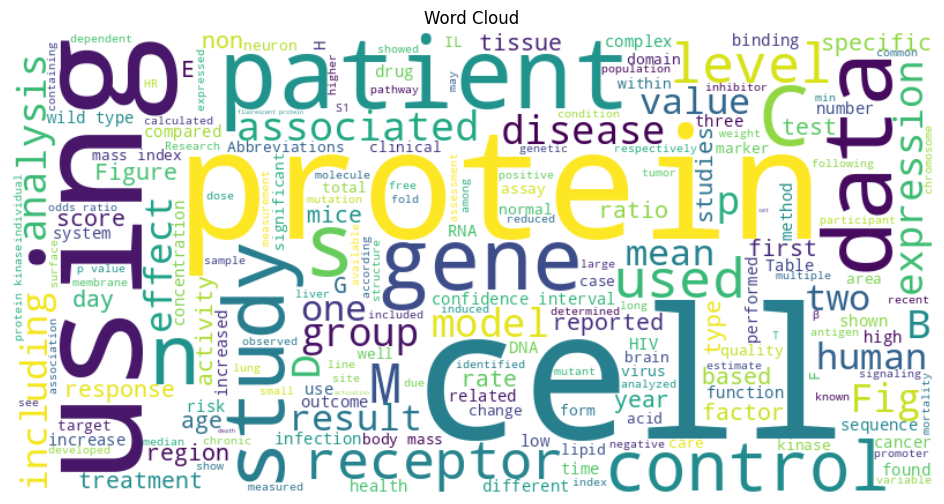

In [ ]:
from wordcloud import WordCloud

# Concatenate all text data
all_text = ' '.join([' '.join(tokens) for data_split in dataset.values() for tokens in data_split['tokens']])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


**CLASS DISTRIBUTION PIE CHART**

The distribution of named entity recognition (NER) tags in the training dataset is shown in this visualisation. The size of each slice in the pie chart, which represents a distinct NER tag, reflects the percentage of times that tag appears in the dataset. It helps to comprehend the class distribution within the dataset by providing a visual summary of the relative frequency of various NER tags.


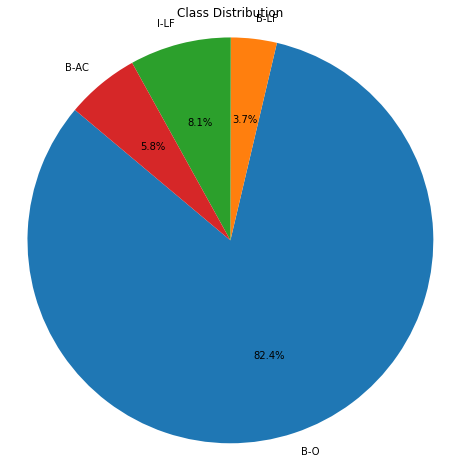

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Flatten the list of lists into a single list
ner_tags_flat = [tag for sublist in dataset['train']['ner_tags'] for tag in sublist]

# Count the occurrences of each class
class_distribution = Counter(ner_tags_flat)

# Plot class distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution.values(), labels=class_distribution.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



**CLASS DISTRIBUTION HISTOGRAM**
The frequency distribution of named entity recognition (NER) tags in the training dataset is shown by this histogram. The height of each bar, which represents a distinct NER tag, shows how frequently that tag appears in the dataset. By giving a visual summary of the NER tag distribution, it makes it easier to determine which tags are most and least common throughout the dataset.

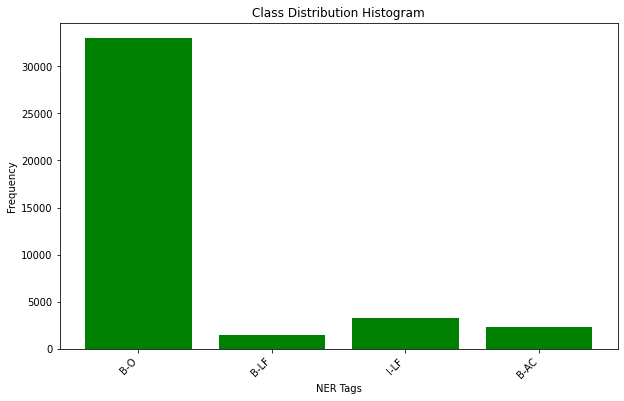

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the list of lists into a single list
ner_tags_flat = [tag for sublist in dataset['train']['ner_tags'] for tag in sublist]

# Count the occurrences of each class
class_distribution = Counter(ner_tags_flat)

# Extract class names and frequencies
classes = list(class_distribution.keys())
frequencies = list(class_distribution.values())

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(classes, frequencies, color='green')
plt.xlabel('NER Tags')
plt.ylabel('Frequency')
plt.title('Class Distribution Histogram')
plt.xticks(rotation=45, ha='right')
plt.show()
